In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [127]:
#all_songs of 5000 songs from a large spotify playlist
all_songs = pd.read_csv(r'C:\Users\charl\Python\GitHub Projects\Spotify_Project\MyData\biggest_playlist_ever.csv')

#Our song history for the last year
hist = pd.read_csv(r'C:\Users\charl\Python\GitHub Projects\Spotify_Project\MyData\streaming_history.csv') 

In [128]:
all_songs.drop(columns = 'Unnamed: 0', inplace=True)

### Feature Descriptions:

acousticness — how acoustic

danceability — self-explanatory

energy — how 'fast, loud an noisy'

instrumentalness — the less vocals, the higher

liveness — whether there is audience in the recording

loudness — self-explanatory

speechiness — the more spoken words, the higher

valence — whether the track sounds happy or sad

tempo — the bpm

In [129]:
hist['seconds']=hist['msPlayed']/1000

In [130]:
hist.drop(columns = 'msPlayed',inplace=True)

In [131]:
hist.head()

,Unnamed: 0,endTime,artistName,trackName,seconds
0,0,2019-09-20 18:05,Elvis Presley,From a Jack to a King,147.973
1,1,2019-09-20 18:08,Elvis Presley,From a Jack to a King,147.973
2,2,2019-09-20 18:26,Marty Robbins,Devil Woman,130.966
3,3,2019-09-21 17:49,Marty Robbins,Devil Woman,6.843
4,4,2019-09-21 17:49,Jimi Hendrix,May This Be Love,39.967


Text(0.5, 1.0, 'Allowed Runtime History')

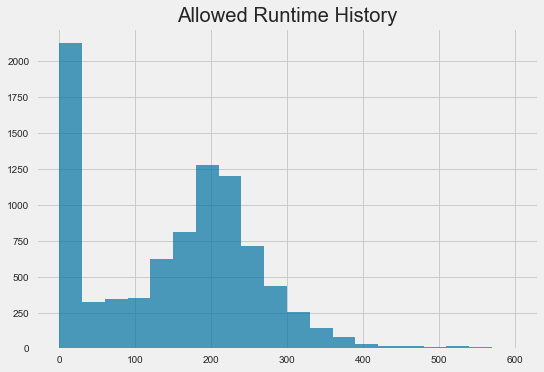

In [132]:
plt.hist(hist['seconds'],bins=20,range = (0,600), color = 'b', alpha = 0.7)
plt.title('Allowed Runtime History')

We can see that we skipp about a quarter of the songs that come on

Let's engineer a column called 'Skip' where it counts the number of times that we have skipped a certain song

We will also create a column called 'Play' where it counts the number of times we have let a song play

Even though just having a skip columns would serve the same purpose, I would like both for visualization purposes

---
We will use 60 seconds as the cutoff points for play or skip

In [133]:
hist['skip'] = np.where(hist['seconds']<60,1,0)
hist['play'] = np.where(hist['seconds']>=60,1,0)

In [134]:
hist.head()

,Unnamed: 0,endTime,artistName,trackName,seconds,skip,play
0,0,2019-09-20 18:05,Elvis Presley,From a Jack to a King,147.973,0,1
1,1,2019-09-20 18:08,Elvis Presley,From a Jack to a King,147.973,0,1
2,2,2019-09-20 18:26,Marty Robbins,Devil Woman,130.966,0,1
3,3,2019-09-21 17:49,Marty Robbins,Devil Woman,6.843,1,0
4,4,2019-09-21 17:49,Jimi Hendrix,May This Be Love,39.967,1,0


In [135]:
tracks = hist.groupby(['trackName','artistName']).agg({'skip':'sum', 'play': 'sum'}).reset_index()

In [136]:
tracks.head()

,trackName,artistName,skip,play
0,"""C"" is for Cookie",Cookie Monster,1,0
1,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,Lil Dicky,1,1
2,'Round Here,IODONTPLAY,0,2
3,'Till I Collapse,Eminem,1,1
4,(Bonus) Air Canada,RiFF Raff & DOLLABiLLGATES,0,2


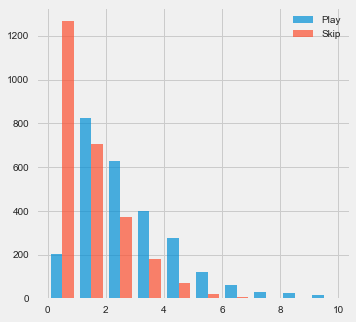

In [137]:
fig, ax = plt.subplots(figsize = (5,5))


play = tracks['play']
skip = tracks['skip']
plt.hist([play,skip], bins  = 10, range = (0,10),alpha = 0.7, label = ['Play','Skip'])
plt.legend(loc='upper right')

We can see that there are a lot more skips with a low total playcount... this could be due to spotify not offering us songs after we skip them once

We also see there aren't many songs that are skipped more than 5 times... Spotify seems to stop giving us songs after we skip them a few times

### Now let's define what songs we enjoy
Any song that has a 75% ratio of plays/skips can be considered enjoyable

In [138]:
tracks['like'] = np.where(tracks['play']/(tracks['skip']+tracks['play'])>=0.75,1,0)

In [139]:
tracks.head(5)

,trackName,artistName,skip,play,like
0,"""C"" is for Cookie",Cookie Monster,1,0,0
1,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,Lil Dicky,1,1,0
2,'Round Here,IODONTPLAY,0,2,1
3,'Till I Collapse,Eminem,1,1,0
4,(Bonus) Air Canada,RiFF Raff & DOLLABiLLGATES,0,2,1


In [140]:
tracks.trackName.nunique()

2584

In [141]:
len(tracks)

2630

In [142]:
#Find if some songs have same name but different artist
a = tracks.groupby('trackName').artistName.count().reset_index()
a[a['artistName']>1].head()

,trackName,artistName
216,Believer,2
286,Bounce,2
375,Chant,2
503,Daybreak,2
504,Daydream,2


### Bring in Features for my song history

In the Song Collection notebook, I have gotten all of the features for songs that I played in the past year as long as they had been played or skipped twice.

I will now read that df into this notebook, so that I can merge it with the skip/play/like features above

In [143]:
my_song_features = pd.read_csv(r'C:\Users\charl\Python\GitHub Projects\Spotify_Project\MyData\songs_for_personal_analysis.csv')

In [144]:
len(my_song_features)

1837

In [145]:
df = pd.merge(my_song_features, tracks,  how='left', on=['trackName','artistName'])
len(df)

1837

In [146]:
df.drop(columns = 'Unnamed: 0',inplace= True)

In [147]:
df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,trackName,artistName,skip,play,like
0,5Le9sSLxWIaIEPPppZ9EuF,0.3300,0.673,254118.0,0.8000,0.0000,7.0,0.689,-6.253,1.0,0.2140,135.997,4.0,0.268,'Round Here,IODONTPLAY,0,2,1
1,5F7bIFd3xWuoXmvXFqFl5M,0.0825,0.744,365950.0,0.5700,0.0000,3.0,0.121,-4.359,0.0,0.0357,75.019,4.0,0.600,(Bonus) Air Canada,RiFF Raff & DOLLABiLLGATES,0,2,1
2,2PzU4IB8Dr6mxV3lHuaG34,0.0383,0.723,222813.0,0.8630,0.0317,2.0,0.128,-7.890,1.0,0.0338,136.302,4.0,0.931,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,2,9,1
3,3qLfQNPEE27KI3Hgd9Om8A,0.9910,0.295,135653.0,0.0706,0.9200,9.0,0.101,-20.157,0.0,0.0439,76.425,1.0,0.139,(prelude),Zachary Bruno,0,2,1
4,4txn9qnwK3ILQqv5oq2mO3,0.3880,0.519,264213.0,0.8090,0.0000,1.0,0.275,-6.362,1.0,0.5560,146.020,4.0,0.262,03' Adolescence,J. Cole,1,4,1


### Finally, we have our dataframe of songs I have listened to in the past year that include their features and if I enjoy them

In [173]:
def heatmap(df, title):
    fig, ax = plt.subplots(figsize = (10,10))
    sns.heatmap(df.corr(),cmap = 'PiYG', center = 0)
    plt.title(title)

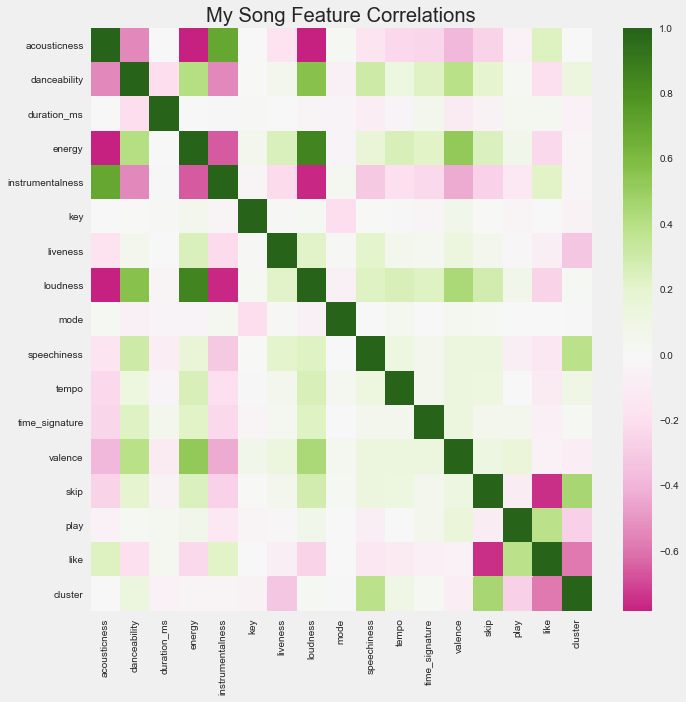

In [174]:
heatmap(df,"My Song Feature Correlations")

Accousticness and instrumentalness have a positive relationship with me liking a song

I don't seem to like dancy, energetic, or loud music

### My Personal Song Data Preprocessing and Clustering

In [150]:
df.dropna(inplace=True)

In [151]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

data = df.drop(columns = ['skip','play','time_signature','mode','key','duration_ms','id','trackName','artistName'])
data_scale = sd.fit_transform(data)

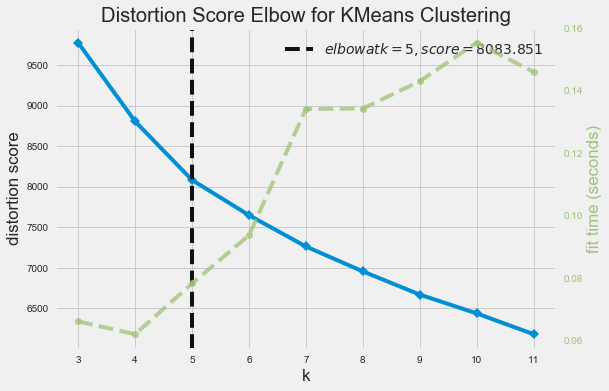

In [152]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(data_scale)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### The Elbow method tell us that 5 clusters is optimal... although we are not seeing a strong elbow so we may want to try a different clustering approach in the future

In [153]:
#Let's actually look at what cluster 1 contains
km = KMeans(n_clusters=5, max_iter=100)
km.fit(data_scale)
labels = km.predict(data_scale)
centroids = km.cluster_centers_

In [154]:
df['cluster'] = labels

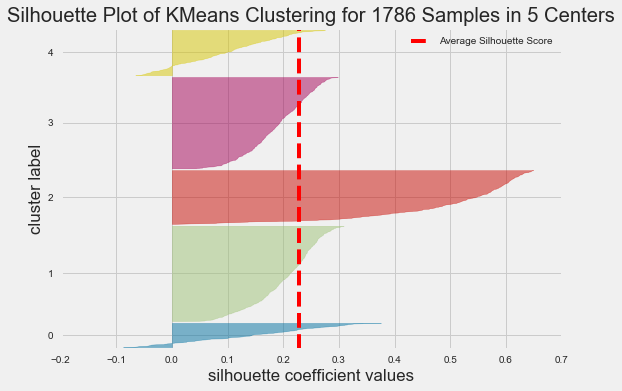

In [155]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


model = KMeans(5)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')


visualizer.fit(data_scale)        # Fit the data to the visualizer
visualizer.show()  


#### We see that cluster 0 is the most distingished of all clusters (high silhouette score), while the other clusters are relevatively similar and non-differentiable

In [156]:
df.groupby('cluster').mean().reset_index()

,cluster,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,skip,play,like
0,0,0.194543,0.604971,241618.578571,0.695907,0.010880,5.528571,0.591793,-6.886186,0.571429,0.198055,121.013150,3.942857,0.497208,1.007143,3.114286,0.592857
1,1,0.176401,0.654505,237526.604736,0.642514,0.034905,5.182149,0.152747,-7.074616,0.575592,0.094996,118.299324,3.958106,0.508145,0.495446,4.406193,1.000000
2,2,0.939097,0.343608,238410.529032,0.087899,0.816524,4.822581,0.114608,-24.202587,0.609677,0.049572,101.582423,3.648387,0.155851,0.300000,2.625806,0.874194
3,3,0.178600,0.652312,230580.005703,0.650006,0.069860,5.062738,0.160823,-6.885209,0.566540,0.090403,122.223297,3.975285,0.427370,2.366920,2.178707,0.000000
4,4,0.231375,0.716774,227550.386973,0.591368,0.009787,4.789272,0.189458,-7.656778,0.559387,0.387410,127.004678,3.954023,0.451990,1.605364,2.796935,0.386973


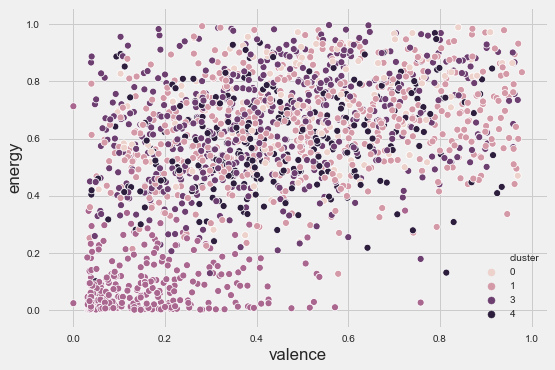

In [157]:
sns.scatterplot(x='valence',y = 'energy',hue='cluster', data = df)

### Now let's look at the large collection of songs we gathered from the 5000 song playlist

In [158]:
all_songs.head(3)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Hozier,Hozier (Deluxe),Take Me To Church,7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.000000,0.116,0.437,128.945,241688,4
1,Mike Posner,31 Minutes to Takeoff,Cooler Than Me - Single Mix,2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0475,0.000000,0.704,0.625,129.969,213293,4
2,"Tyler, The Creator",Flower Boy,See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.000007,0.109,0.620,78.558,180387,4


In [159]:
all_songs.drop(columns = ['time_signature'], inplace=True)

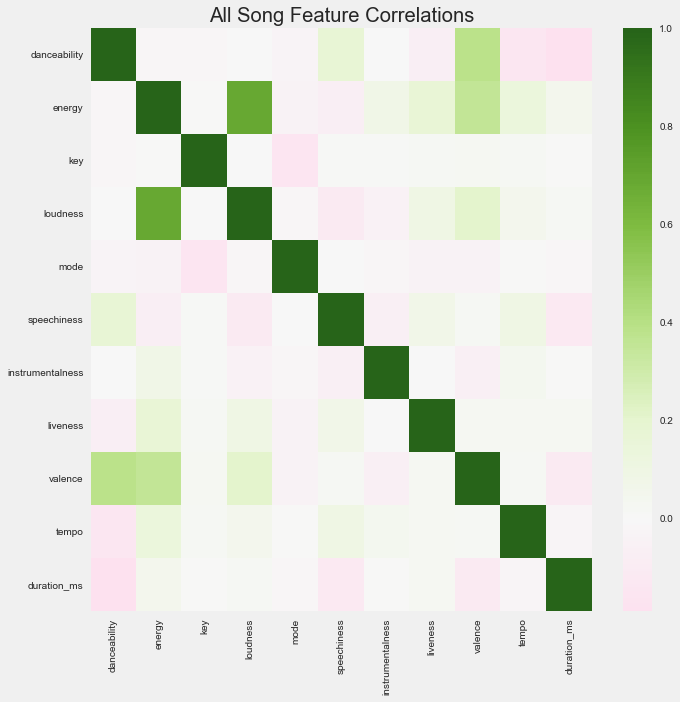

In [175]:
heatmap(all_songs,'All Song Feature Correlations')

### Get all_songs ready for clustering

In [161]:
#Delete mode and key because they only really interact with each other and had no bearing on me liking a song in the previous hmap
df_all = all_songs.drop(columns = ['album','mode','key','track_id','track_name','artist'])

In [162]:
df_all.dropna(inplace=True)

In [163]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

data = df_all
data_scale = sd.fit_transform(data)

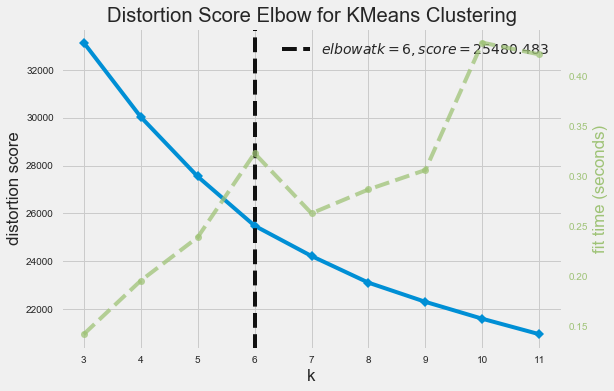

In [164]:
#Same pipeline we used above
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(data_scale)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [169]:
a = 'hello'
s = '{}'.format(a)

In [170]:
s

'hello'